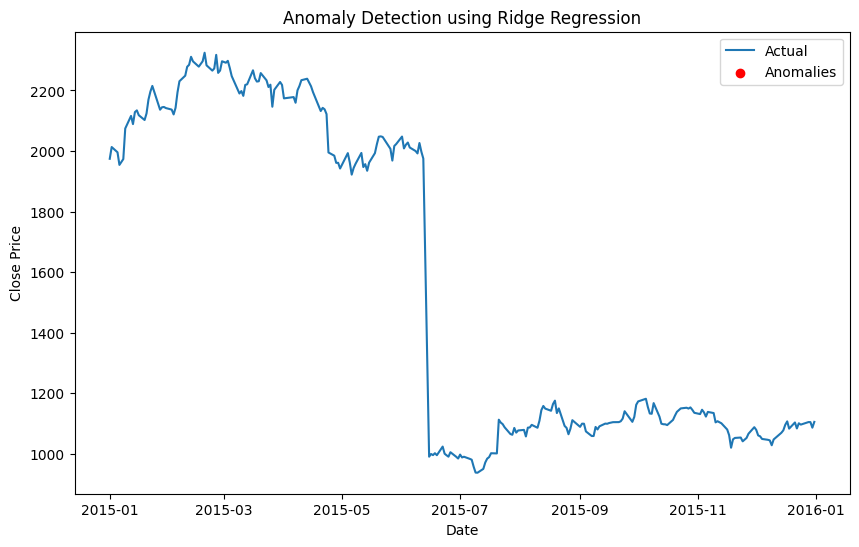

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('infy_stock.csv')

# Assuming the dataset has 'Date' and 'Close' columns
dates = pd.to_datetime(data['Date'])
close_prices = data['Close'].values

# Feature engineering
# In this simple example, we'll use lag features
lags = 5
X = np.zeros((len(close_prices) - lags, lags))
y = close_prices[lags:]

for i in range(lags):
    X[:, i] = close_prices[i:i+len(y)]

# Split data into train and test sets
split_ratio = 0.8
split_index = int(len(y) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Ridge regression model
alpha = 1.0  # regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate mean and standard deviation of residuals
residuals_mean = np.mean(train_residuals)
residuals_std = np.std(train_residuals)

# Define anomaly threshold
anomaly_threshold = residuals_mean + 3 * residuals_std

# Detect anomalies
anomalies = np.abs(test_residuals) > anomaly_threshold
anomaly_dates = dates[split_index + lags:][anomalies]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, label='Actual')
plt.scatter(anomaly_dates, y_test[anomalies], color='red', marker='o', label='Anomalies')
plt.title('Anomaly Detection using Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
